In [103]:
%matplotlib inline

In [111]:
import numpy as np
import torch
import torch.nn as nn
import torch.functional as F
import torch.utils.data as data_utils
import matplotlib.pyplot as plt
from torchdiffeq import odeint
from torchcontrol.arch_cpugpu import HDNN, HDNN_Observer
from torchcontrol.utils import genpoints
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [112]:
if torch.cuda.is_available(): device = torch.device('cuda')

In [113]:
a = 3.0
b = 1.0
c = 1.0
d = 1.0
# Dissipation rate
k = 0.25

In [114]:
# define the ODE
def LV(x,t):
    u = x[0]
    v = x[1]
    dudt = a*u - b*u*v 
    dvdt = -c*v +d*u*v + k*(a-b*v)*v
    return [dudt,dvdt]

In [115]:
# Simulate the systems
N = 1000
Tf = 10
Ts = Tf/N
print('The sampling time is ',Ts,'s')
t = np.linspace(0,Tf,N).tolist()
# standard form
x0 = [0.5,0.5]
x = odeint(LV,x0,t)

The sampling time is  0.01 s


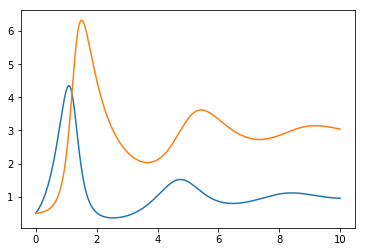

In [116]:
# Plot Time ev. of the system
plt.figure()
plt.plot(t,x)

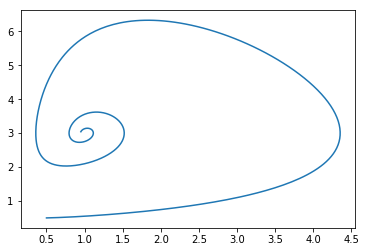

In [117]:
#Plot State-space trajectory
plt.figure()
plt.plot(x[:,0],x[:,1])

## HDNN

#### Method 1: trajectory ---> vec field

In [15]:
x = torch.Tensor(x).to(device)
labels = x[1:]
x0 = x[0].view(1,2)

In [16]:
obs = HDNN_Observer('MLP', [[2,36,2], False], [1,2,0], 1, 'cpu')

In [17]:
t = obs.observe(x0, labels, epoch=1, ode_t=2, ode_step=2, loss_record_interval=100)

odeint iter: 10 
odeint iter: 20 
odeint iter: 30 
odeint iter: 40 
odeint iter: 50 
odeint iter: 60 
odeint iter: 70 
odeint iter: 80 
odeint iter: 90 
odeint iter: 100 
odeint iter: 110 
odeint iter: 120 
odeint iter: 130 
odeint iter: 140 
odeint iter: 150 
odeint iter: 160 
odeint iter: 170 
odeint iter: 180 
odeint iter: 190 
odeint iter: 200 
odeint iter: 210 
odeint iter: 220 
odeint iter: 230 
odeint iter: 240 
odeint iter: 250 
odeint iter: 260 
odeint iter: 270 
odeint iter: 280 
odeint iter: 290 
odeint iter: 300 
odeint iter: 310 
odeint iter: 320 
odeint iter: 330 
odeint iter: 340 
odeint iter: 350 
odeint iter: 360 
odeint iter: 370 
odeint iter: 380 
odeint iter: 390 
odeint iter: 400 
odeint iter: 410 
odeint iter: 420 
odeint iter: 430 
odeint iter: 440 
odeint iter: 450 
odeint iter: 460 
odeint iter: 470 
odeint iter: 480 
odeint iter: 490 
odeint iter: 500 
odeint iter: 510 
odeint iter: 520 
odeint iter: 530 
odeint iter: 540 
odeint iter: 550 
odeint iter: 560 
o

odeint iter: 4420 
odeint iter: 4430 
odeint iter: 4440 
odeint iter: 4450 
odeint iter: 4460 
odeint iter: 4470 
odeint iter: 4480 
odeint iter: 4490 
odeint iter: 4500 
odeint iter: 4510 
odeint iter: 4520 
odeint iter: 4530 
odeint iter: 4540 
odeint iter: 4550 
odeint iter: 4560 
odeint iter: 4570 
odeint iter: 4580 
odeint iter: 4590 
odeint iter: 4600 
odeint iter: 4610 
odeint iter: 4620 
odeint iter: 4630 
odeint iter: 4640 
odeint iter: 4650 
odeint iter: 4660 
odeint iter: 4670 
odeint iter: 4680 
odeint iter: 4690 
odeint iter: 4700 
odeint iter: 4710 
odeint iter: 4720 
odeint iter: 4730 
odeint iter: 4740 
odeint iter: 4750 
odeint iter: 4760 
odeint iter: 4770 
odeint iter: 4780 
odeint iter: 4790 
odeint iter: 4800 
odeint iter: 4810 
odeint iter: 4820 
odeint iter: 4830 
odeint iter: 4840 
odeint iter: 4850 
odeint iter: 4860 
odeint iter: 4870 
odeint iter: 4880 
odeint iter: 4890 
odeint iter: 4900 
odeint iter: 4910 
odeint iter: 4920 
odeint iter: 4930 
odeint iter:

odeint iter: 8760 
odeint iter: 8770 
odeint iter: 8780 
odeint iter: 8790 
odeint iter: 8800 
odeint iter: 8810 
odeint iter: 8820 
odeint iter: 8830 
odeint iter: 8840 
odeint iter: 8850 
odeint iter: 8860 
odeint iter: 8870 
odeint iter: 8880 
odeint iter: 8890 
odeint iter: 8900 
odeint iter: 8910 
odeint iter: 8920 
odeint iter: 8930 
odeint iter: 8940 
odeint iter: 8950 
odeint iter: 8960 
odeint iter: 8970 
odeint iter: 8980 
odeint iter: 8990 
odeint iter: 9000 
odeint iter: 9010 
odeint iter: 9020 
odeint iter: 9030 
odeint iter: 9040 
odeint iter: 9050 
odeint iter: 9060 
odeint iter: 9070 
odeint iter: 9080 
odeint iter: 9090 
odeint iter: 9100 
odeint iter: 9110 
odeint iter: 9120 
odeint iter: 9130 
odeint iter: 9140 
odeint iter: 9150 
odeint iter: 9160 
odeint iter: 9170 
odeint iter: 9180 
odeint iter: 9190 
odeint iter: 9200 
odeint iter: 9210 
odeint iter: 9220 
odeint iter: 9230 
odeint iter: 9240 
odeint iter: 9250 
odeint iter: 9260 
odeint iter: 9270 
odeint iter:

odeint iter: 12940 
odeint iter: 12950 
odeint iter: 12960 
odeint iter: 12970 
odeint iter: 12980 
odeint iter: 12990 
odeint iter: 13000 
odeint iter: 13010 
odeint iter: 13020 
odeint iter: 13030 
odeint iter: 13040 
odeint iter: 13050 
odeint iter: 13060 
odeint iter: 13070 
odeint iter: 13080 
odeint iter: 13090 
odeint iter: 13100 
odeint iter: 13110 
odeint iter: 13120 
odeint iter: 13130 
odeint iter: 13140 
odeint iter: 13150 
odeint iter: 13160 
odeint iter: 13170 
odeint iter: 13180 
odeint iter: 13190 
odeint iter: 13200 
odeint iter: 13210 
odeint iter: 13220 
odeint iter: 13230 
odeint iter: 13240 
odeint iter: 13250 
odeint iter: 13260 
odeint iter: 13270 
odeint iter: 13280 
odeint iter: 13290 
odeint iter: 13300 
odeint iter: 13310 
odeint iter: 13320 
odeint iter: 13330 
odeint iter: 13340 
odeint iter: 13350 
odeint iter: 13360 
odeint iter: 13370 
odeint iter: 13380 
odeint iter: 13390 
odeint iter: 13400 
odeint iter: 13410 
odeint iter: 13420 
odeint iter: 13430 


odeint iter: 17060 
odeint iter: 17070 
odeint iter: 17080 
odeint iter: 17090 
odeint iter: 17100 
odeint iter: 17110 
odeint iter: 17120 
odeint iter: 17130 
odeint iter: 17140 
odeint iter: 17150 
odeint iter: 17160 
odeint iter: 17170 
odeint iter: 17180 
odeint iter: 17190 
odeint iter: 17200 
odeint iter: 17210 
odeint iter: 17220 
odeint iter: 17230 
odeint iter: 17240 
odeint iter: 17250 
odeint iter: 17260 
odeint iter: 17270 
odeint iter: 17280 
odeint iter: 17290 
odeint iter: 17300 
odeint iter: 17310 
odeint iter: 17320 
odeint iter: 17330 
odeint iter: 17340 
odeint iter: 17350 
odeint iter: 17360 
odeint iter: 17370 
odeint iter: 17380 
odeint iter: 17390 
odeint iter: 17400 
odeint iter: 17410 
odeint iter: 17420 
odeint iter: 17430 
odeint iter: 17440 
odeint iter: 17450 
odeint iter: 17460 
odeint iter: 17470 
odeint iter: 17480 
odeint iter: 17490 
odeint iter: 17500 
odeint iter: 17510 
odeint iter: 17520 
odeint iter: 17530 
odeint iter: 17540 
odeint iter: 17550 


odeint iter: 21180 
odeint iter: 21190 
odeint iter: 21200 
odeint iter: 21210 
odeint iter: 21220 
odeint iter: 21230 
odeint iter: 21240 
odeint iter: 21250 
odeint iter: 21260 
odeint iter: 21270 
odeint iter: 21280 
odeint iter: 21290 
odeint iter: 21300 
odeint iter: 21310 
odeint iter: 21320 
odeint iter: 21330 
odeint iter: 21340 
odeint iter: 21350 
odeint iter: 21360 
odeint iter: 21370 
odeint iter: 21380 
odeint iter: 21390 
odeint iter: 21400 
odeint iter: 21410 
odeint iter: 21420 
odeint iter: 21430 
odeint iter: 21440 
odeint iter: 21450 
odeint iter: 21460 
odeint iter: 21470 
odeint iter: 21480 
odeint iter: 21490 
odeint iter: 21500 
odeint iter: 21510 
odeint iter: 21520 
odeint iter: 21530 
odeint iter: 21540 
odeint iter: 21550 
odeint iter: 21560 
odeint iter: 21570 
odeint iter: 21580 
odeint iter: 21590 
odeint iter: 21600 
odeint iter: 21610 
odeint iter: 21620 
odeint iter: 21630 
odeint iter: 21640 
odeint iter: 21650 
odeint iter: 21660 
odeint iter: 21670 


odeint iter: 25300 
odeint iter: 25310 
odeint iter: 25320 
odeint iter: 25330 
odeint iter: 25340 
odeint iter: 25350 
odeint iter: 25360 
odeint iter: 25370 
odeint iter: 25380 
odeint iter: 25390 
odeint iter: 25400 
odeint iter: 25410 
odeint iter: 25420 
odeint iter: 25430 
odeint iter: 25440 
odeint iter: 25450 
odeint iter: 25460 
odeint iter: 25470 
odeint iter: 25480 
odeint iter: 25490 
odeint iter: 25500 
odeint iter: 25510 
odeint iter: 25520 
odeint iter: 25530 
odeint iter: 25540 
odeint iter: 25550 
odeint iter: 25560 
odeint iter: 25570 
odeint iter: 25580 
odeint iter: 25590 
odeint iter: 25600 
odeint iter: 25610 
odeint iter: 25620 
odeint iter: 25630 
odeint iter: 25640 
odeint iter: 25650 
odeint iter: 25660 
odeint iter: 25670 
odeint iter: 25680 
odeint iter: 25690 
odeint iter: 25700 
odeint iter: 25710 
odeint iter: 25720 
odeint iter: 25730 
odeint iter: 25740 
odeint iter: 25750 
odeint iter: 25760 
odeint iter: 25770 
odeint iter: 25780 
odeint iter: 25790 


odeint iter: 29410 
odeint iter: 29420 
odeint iter: 29430 
odeint iter: 29440 
odeint iter: 29450 
odeint iter: 29460 
odeint iter: 29470 
odeint iter: 29480 
odeint iter: 29490 
odeint iter: 29500 
odeint iter: 29510 
odeint iter: 29520 
odeint iter: 29530 
odeint iter: 29540 
odeint iter: 29550 
odeint iter: 29560 
odeint iter: 29570 
odeint iter: 29580 
odeint iter: 29590 
odeint iter: 29600 
odeint iter: 29610 
odeint iter: 29620 
odeint iter: 29630 
odeint iter: 29640 
odeint iter: 29650 
odeint iter: 29660 
odeint iter: 29670 
odeint iter: 29680 
odeint iter: 29690 
odeint iter: 29700 
odeint iter: 29710 
odeint iter: 29720 
odeint iter: 29730 
odeint iter: 29740 
odeint iter: 29750 
odeint iter: 29760 
odeint iter: 29770 
odeint iter: 29780 
odeint iter: 29790 
odeint iter: 29800 
odeint iter: 29810 
odeint iter: 29820 
odeint iter: 29830 
odeint iter: 29840 
odeint iter: 29850 
odeint iter: 29860 
odeint iter: 29870 
odeint iter: 29880 
odeint iter: 29890 
odeint iter: 29900 


odeint iter: 33520 
odeint iter: 33530 
odeint iter: 33540 
odeint iter: 33550 
odeint iter: 33560 
odeint iter: 33570 
odeint iter: 33580 
odeint iter: 33590 
odeint iter: 33600 
odeint iter: 33610 
odeint iter: 33620 
odeint iter: 33630 
odeint iter: 33640 
odeint iter: 33650 
odeint iter: 33660 
odeint iter: 33670 
odeint iter: 33680 
odeint iter: 33690 
odeint iter: 33700 
odeint iter: 33710 
odeint iter: 33720 
odeint iter: 33730 
odeint iter: 33740 
odeint iter: 33750 
odeint iter: 33760 
odeint iter: 33770 
odeint iter: 33780 
odeint iter: 33790 
odeint iter: 33800 
odeint iter: 33810 
odeint iter: 33820 
odeint iter: 33830 
odeint iter: 33840 
odeint iter: 33850 
odeint iter: 33860 
odeint iter: 33870 
odeint iter: 33880 
odeint iter: 33890 
odeint iter: 33900 
odeint iter: 33910 
odeint iter: 33920 
odeint iter: 33930 
odeint iter: 33940 
odeint iter: 33950 
odeint iter: 33960 
odeint iter: 33970 
odeint iter: 33980 
odeint iter: 33990 
odeint iter: 34000 
odeint iter: 34010 


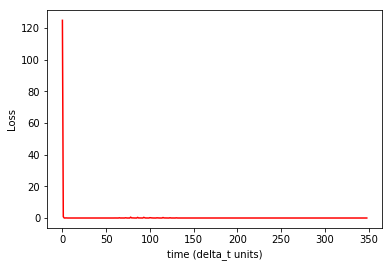

In [18]:
obs.plotLoss()

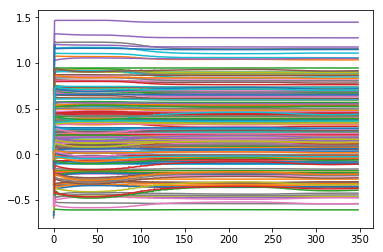

In [19]:
obs.plotParameters()

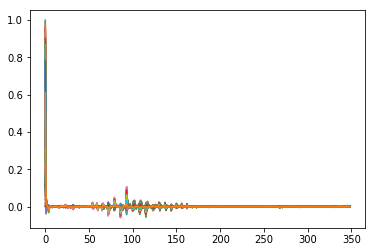

In [20]:
obs.plotVelocities()

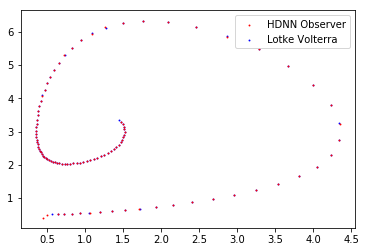

In [21]:
for p in range(len(t)-1):
    plt.scatter(t[p][0][0].cpu().numpy(),t[p][0][1].cpu().numpy(), s=0.8, color='r')
    plt.scatter(labels[p][0].cpu().numpy(),labels[p][1].cpu().numpy(), s=0.8, color='b')
    plt.legend(['HDNN Observer','Lotke Volterra'])

In [53]:
p = torch.Tensor([0.4,0.4]).to(device)
traj = []
for i in range(100):
    traj.append(p.flatten())
    p = obs.predictor(p.view(1,2))    

In [62]:
N = 100
Tf = 5
Ts = Tf/N
print('The sampling time is ',Ts,'s')
t = np.linspace(0,Tf,N).tolist()
# standard form
x0 = [0.4,0.4]
x = odeint(LV,x0,t)

The sampling time is  0.05 s


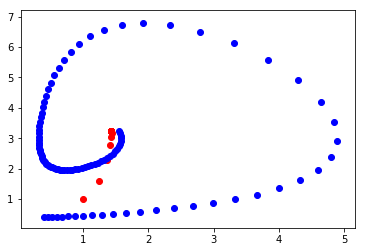

In [64]:
for j in range(len(traj)):
    plt.scatter(traj[j][0].cpu().detach().numpy(), traj[j][1].cpu().detach().numpy(), color='r')
    plt.scatter(x[j][0],x[j][1], color='b')

In [60]:
p = torch.Tensor([1,1]).to(device)
traj = []
for i in range(100):
    traj.append(p.flatten())
    p = obs.predictor(p.view(1,2))    

In [65]:
N = 100
Tf = 5
Ts = Tf/N
print('The sampling time is ',Ts,'s')
t = np.linspace(0,Tf,N).tolist()
# standard form
x0 = [1,1]
x = odeint(LV,x0,t)

The sampling time is  0.05 s


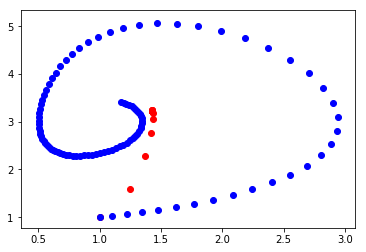

In [66]:
for j in range(len(traj)):
    plt.scatter(traj[j][0].cpu().detach().numpy(), traj[j][1].cpu().detach().numpy(), color='r')
    plt.scatter(x[j][0],x[j][1], color='b')

In [22]:
def calculateComponents(x0, x1):
    return x1[0] - x0[0], x1[1] - x0[1]

In [23]:
mh = genpoints(0.5, 5, 1, 6, 10)

In [24]:
obs.predictor(mh[0].view(1,2))

tensor([[0.9608, 0.6282]], device='cuda:0', grad_fn=<AddmmBackward>)

In [25]:
U, V = [], []
for point in mh:
        un, vn = calculateComponents(point, obs.predictor(point.view(1,2)).flatten())
        U.append(un)
        V.append(vn)

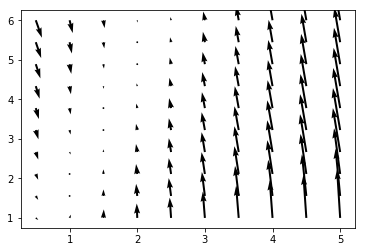

In [26]:
plt.quiver([p[0].detach().cpu() for p in mh], [p[1].detach().cpu() for p in mh], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])

In [27]:
U, V = [], []
t = torch.linspace(0,Ts)
for point in mh:
        xi0 = point.cpu()        
        sol = odeint(LV, xi0, t)
        un, vn = calculateComponents(point, sol[-1])
        U.append(un)
        V.append(vn)

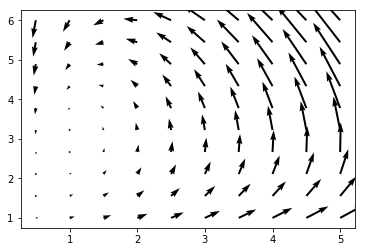

In [28]:
plt.quiver([p[0].detach().cpu() for p in mh], [p[1].detach().cpu() for p in mh], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])

### vec field on trajectory only

In [29]:
U, V = [], []
for point in x:
        un, vn = calculateComponents(point, obs.predictor(point.view(1,2)).flatten())
        U.append(un)
        V.append(vn)

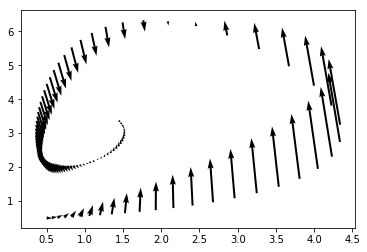

In [30]:
plt.quiver([p[0].detach().cpu() for p in x], [p[1].detach().cpu() for p in x], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])

In [31]:
U, V = [], []
t = torch.linspace(0,Ts,2)
for point in x:
        xi0 = point.cpu()
        sol = odeint(LV, xi0, t)
        un, vn = calculateComponents(point, sol[-1])
        U.append(un)
        V.append(vn)

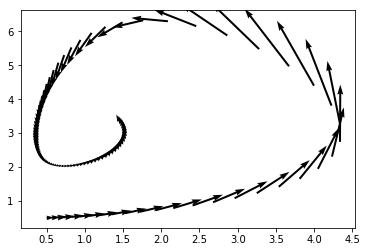

In [32]:
plt.quiver([p[0].detach().cpu() for p in x], [p[1].detach().cpu() for p in x], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])

## Method 2: vec field --> trajectory

In [118]:
x = torch.Tensor(x).to(device)
x[1:]
x0 = x[0].view(1,2)

In [119]:
grad = ([(x[i+1] - x[i])/0.01 for i in range(len(x)-1)])
grad = torch.Tensor([g.cpu().numpy() for g in grad])

In [120]:
train = data_utils.TensorDataset(x[:-1], grad)
trainloader = data_utils.DataLoader(train, batch_size=333)

In [121]:
obs = HDNN('MLP', [[2, 36, 2], False], [1,1,0], 1, 'cpu')

In [122]:
obs.fit(trainloader, epoch=1000, time_delta=100, iter_accuracy=float('inf'), ode_t=0.01, ode_step=2, criterion='mse')

odeint iter: 10 
odeint iter: 20 
odeint iter: 30 
odeint iter: 40 
odeint iter: 50 
odeint iter: 60 
odeint iter: 70 
odeint iter: 80 
odeint iter: 90 
odeint iter: 100 
odeint iter: 110 
odeint iter: 120 
odeint iter: 130 
odeint iter: 140 
odeint iter: 150 
odeint iter: 160 
odeint iter: 170 
odeint iter: 180 
odeint iter: 190 
odeint iter: 200 
odeint iter: 210 
odeint iter: 220 
odeint iter: 230 
odeint iter: 240 
odeint iter: 250 
odeint iter: 260 
odeint iter: 270 
odeint iter: 280 
odeint iter: 290 
odeint iter: 300 
odeint iter: 310 
odeint iter: 320 
odeint iter: 330 
odeint iter: 340 
odeint iter: 350 
odeint iter: 360 
odeint iter: 370 
odeint iter: 380 
odeint iter: 390 
odeint iter: 400 
odeint iter: 410 
odeint iter: 420 
odeint iter: 430 
odeint iter: 440 
odeint iter: 450 
odeint iter: 460 
odeint iter: 470 
odeint iter: 480 
odeint iter: 490 
odeint iter: 500 
odeint iter: 510 
odeint iter: 520 
odeint iter: 530 
odeint iter: 540 
odeint iter: 550 
odeint iter: 560 
o

odeint iter: 4410 
odeint iter: 4420 
odeint iter: 4430 
odeint iter: 4440 
odeint iter: 4450 
odeint iter: 4460 
odeint iter: 4470 
odeint iter: 4480 
odeint iter: 4490 
odeint iter: 4500 
odeint iter: 4510 
odeint iter: 4520 
odeint iter: 4530 
odeint iter: 4540 
odeint iter: 4550 
odeint iter: 4560 
odeint iter: 4570 
odeint iter: 4580 
odeint iter: 4590 
odeint iter: 4600 
odeint iter: 4610 
odeint iter: 4620 
odeint iter: 4630 
odeint iter: 4640 
odeint iter: 4650 
odeint iter: 4660 
odeint iter: 4670 
odeint iter: 4680 
odeint iter: 4690 
odeint iter: 4700 
odeint iter: 4710 
odeint iter: 4720 
odeint iter: 4730 
odeint iter: 4740 
odeint iter: 4750 
odeint iter: 4760 
odeint iter: 4770 
odeint iter: 4780 
odeint iter: 4790 
odeint iter: 4800 
odeint iter: 4810 
odeint iter: 4820 
odeint iter: 4830 
odeint iter: 4840 
odeint iter: 4850 
odeint iter: 4860 
odeint iter: 4870 
odeint iter: 4880 
odeint iter: 4890 
odeint iter: 4900 
odeint iter: 4910 
odeint iter: 4920 
odeint iter:

odeint iter: 8730 
odeint iter: 8740 
odeint iter: 8750 
odeint iter: 8760 
odeint iter: 8770 
odeint iter: 8780 
odeint iter: 8790 
odeint iter: 8800 
odeint iter: 8810 
odeint iter: 8820 
odeint iter: 8830 
odeint iter: 8840 
odeint iter: 8850 
odeint iter: 8860 
odeint iter: 8870 
odeint iter: 8880 
odeint iter: 8890 
odeint iter: 8900 
odeint iter: 8910 
odeint iter: 8920 
odeint iter: 8930 
odeint iter: 8940 
odeint iter: 8950 
odeint iter: 8960 
odeint iter: 8970 
odeint iter: 8980 
odeint iter: 8990 
odeint iter: 9000 
odeint iter: 9010 
odeint iter: 9020 
odeint iter: 9030 
odeint iter: 9040 
odeint iter: 9050 
odeint iter: 9060 
odeint iter: 9070 
odeint iter: 9080 
odeint iter: 9090 
odeint iter: 9100 
odeint iter: 9110 
odeint iter: 9120 
odeint iter: 9130 
odeint iter: 9140 
odeint iter: 9150 
odeint iter: 9160 
odeint iter: 9170 
odeint iter: 9180 
odeint iter: 9190 
odeint iter: 9200 
odeint iter: 9210 
odeint iter: 9220 
odeint iter: 9230 
odeint iter: 9240 
odeint iter:

odeint iter: 12900 
odeint iter: 12910 
odeint iter: 12920 
odeint iter: 12930 
odeint iter: 12940 
odeint iter: 12950 
odeint iter: 12960 
odeint iter: 12970 
odeint iter: 12980 
odeint iter: 12990 
odeint iter: 13000 
odeint iter: 13010 
odeint iter: 13020 
odeint iter: 13030 
odeint iter: 13040 
odeint iter: 13050 
odeint iter: 13060 
odeint iter: 13070 
odeint iter: 13080 
odeint iter: 13090 
odeint iter: 13100 
odeint iter: 13110 
odeint iter: 13120 
odeint iter: 13130 
odeint iter: 13140 
odeint iter: 13150 
odeint iter: 13160 
odeint iter: 13170 
odeint iter: 13180 
odeint iter: 13190 
odeint iter: 13200 
odeint iter: 13210 
odeint iter: 13220 
odeint iter: 13230 
odeint iter: 13240 
odeint iter: 13250 
odeint iter: 13260 
odeint iter: 13270 
odeint iter: 13280 
odeint iter: 13290 
odeint iter: 13300 
odeint iter: 13310 
odeint iter: 13320 
odeint iter: 13330 
odeint iter: 13340 
odeint iter: 13350 
odeint iter: 13360 
odeint iter: 13370 
odeint iter: 13380 
odeint iter: 13390 


odeint iter: 17000 
odeint iter: 17010 
odeint iter: 17020 
odeint iter: 17030 
odeint iter: 17040 
odeint iter: 17050 
odeint iter: 17060 
odeint iter: 17070 
odeint iter: 17080 
odeint iter: 17090 
odeint iter: 17100 
odeint iter: 17110 
odeint iter: 17120 
odeint iter: 17130 
odeint iter: 17140 
odeint iter: 17150 
odeint iter: 17160 
odeint iter: 17170 
odeint iter: 17180 
odeint iter: 17190 
odeint iter: 17200 
odeint iter: 17210 
odeint iter: 17220 
odeint iter: 17230 
odeint iter: 17240 
odeint iter: 17250 
odeint iter: 17260 
odeint iter: 17270 
odeint iter: 17280 
odeint iter: 17290 
odeint iter: 17300 
odeint iter: 17310 
odeint iter: 17320 
odeint iter: 17330 
odeint iter: 17340 
odeint iter: 17350 
odeint iter: 17360 
odeint iter: 17370 
odeint iter: 17380 
odeint iter: 17390 
odeint iter: 17400 
odeint iter: 17410 
odeint iter: 17420 
odeint iter: 17430 
odeint iter: 17440 
odeint iter: 17450 
odeint iter: 17460 
odeint iter: 17470 
odeint iter: 17480 
odeint iter: 17490 


odeint iter: 21120 
odeint iter: 21130 
odeint iter: 21140 
odeint iter: 21150 
odeint iter: 21160 
odeint iter: 21170 
odeint iter: 21180 
odeint iter: 21190 
odeint iter: 21200 
odeint iter: 21210 
odeint iter: 21220 
odeint iter: 21230 
odeint iter: 21240 
odeint iter: 21250 
odeint iter: 21260 
odeint iter: 21270 
odeint iter: 21280 
odeint iter: 21290 
odeint iter: 21300 
odeint iter: 21310 
odeint iter: 21320 
odeint iter: 21330 
odeint iter: 21340 
odeint iter: 21350 
odeint iter: 21360 
odeint iter: 21370 
odeint iter: 21380 
odeint iter: 21390 
odeint iter: 21400 
odeint iter: 21410 
odeint iter: 21420 
odeint iter: 21430 
odeint iter: 21440 
odeint iter: 21450 
odeint iter: 21460 
odeint iter: 21470 
odeint iter: 21480 
odeint iter: 21490 
odeint iter: 21500 
odeint iter: 21510 
odeint iter: 21520 
odeint iter: 21530 
odeint iter: 21540 
odeint iter: 21550 
odeint iter: 21560 
odeint iter: 21570 
odeint iter: 21580 
odeint iter: 21590 
odeint iter: 21600 
odeint iter: 21610 


odeint iter: 25230 
odeint iter: 25240 
odeint iter: 25250 
odeint iter: 25260 
odeint iter: 25270 
odeint iter: 25280 
odeint iter: 25290 
odeint iter: 25300 
odeint iter: 25310 
odeint iter: 25320 
odeint iter: 25330 
odeint iter: 25340 
odeint iter: 25350 
odeint iter: 25360 
odeint iter: 25370 
odeint iter: 25380 
odeint iter: 25390 
odeint iter: 25400 
odeint iter: 25410 
odeint iter: 25420 
odeint iter: 25430 
odeint iter: 25440 
odeint iter: 25450 
odeint iter: 25460 
odeint iter: 25470 
odeint iter: 25480 
odeint iter: 25490 
odeint iter: 25500 
odeint iter: 25510 
odeint iter: 25520 
odeint iter: 25530 
odeint iter: 25540 
odeint iter: 25550 
odeint iter: 25560 
odeint iter: 25570 
odeint iter: 25580 
odeint iter: 25590 
odeint iter: 25600 
odeint iter: 25610 
odeint iter: 25620 
odeint iter: 25630 
odeint iter: 25640 
odeint iter: 25650 
odeint iter: 25660 
odeint iter: 25670 
odeint iter: 25680 
odeint iter: 25690 
odeint iter: 25700 
odeint iter: 25710 
odeint iter: 25720 


odeint iter: 29340 
odeint iter: 29350 
odeint iter: 29360 
odeint iter: 29370 
odeint iter: 29380 
odeint iter: 29390 
odeint iter: 29400 
odeint iter: 29410 
odeint iter: 29420 
odeint iter: 29430 
odeint iter: 29440 
odeint iter: 29450 
odeint iter: 29460 
odeint iter: 29470 
odeint iter: 29480 
odeint iter: 29490 
odeint iter: 29500 
odeint iter: 29510 
odeint iter: 29520 
odeint iter: 29530 
odeint iter: 29540 
odeint iter: 29550 
odeint iter: 29560 
odeint iter: 29570 
odeint iter: 29580 
odeint iter: 29590 
odeint iter: 29600 
odeint iter: 29610 
odeint iter: 29620 
odeint iter: 29630 
odeint iter: 29640 
odeint iter: 29650 
odeint iter: 29660 
odeint iter: 29670 
odeint iter: 29680 
odeint iter: 29690 
odeint iter: 29700 
odeint iter: 29710 
odeint iter: 29720 
odeint iter: 29730 
odeint iter: 29740 
odeint iter: 29750 
odeint iter: 29760 
odeint iter: 29770 
odeint iter: 29780 
odeint iter: 29790 
odeint iter: 29800 
odeint iter: 29810 
odeint iter: 29820 
odeint iter: 29830 


odeint iter: 33450 
odeint iter: 33460 
odeint iter: 33470 
odeint iter: 33480 
odeint iter: 33490 
odeint iter: 33500 
odeint iter: 33510 
odeint iter: 33520 
odeint iter: 33530 
odeint iter: 33540 
odeint iter: 33550 
odeint iter: 33560 
odeint iter: 33570 
odeint iter: 33580 
odeint iter: 33590 
odeint iter: 33600 
odeint iter: 33610 
odeint iter: 33620 
odeint iter: 33630 
odeint iter: 33640 
odeint iter: 33650 
odeint iter: 33660 
odeint iter: 33670 
odeint iter: 33680 
odeint iter: 33690 
odeint iter: 33700 
odeint iter: 33710 
odeint iter: 33720 
odeint iter: 33730 
odeint iter: 33740 
odeint iter: 33750 
odeint iter: 33760 
odeint iter: 33770 
odeint iter: 33780 
odeint iter: 33790 
odeint iter: 33800 
odeint iter: 33810 
odeint iter: 33820 
odeint iter: 33830 
odeint iter: 33840 
odeint iter: 33850 
odeint iter: 33860 
odeint iter: 33870 
odeint iter: 33880 
odeint iter: 33890 
odeint iter: 33900 
odeint iter: 33910 
odeint iter: 33920 
odeint iter: 33930 
odeint iter: 33940 


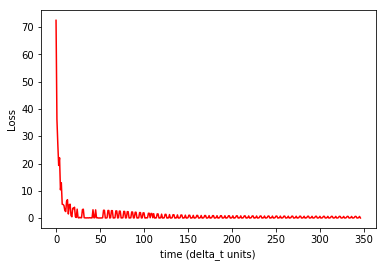

In [129]:
obs.plotLoss()

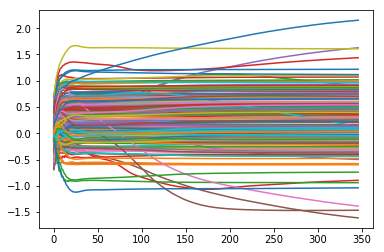

In [130]:
obs.plotParameters()

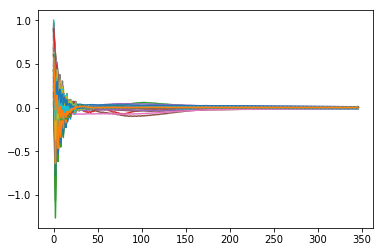

In [131]:
obs.plotVelocities()

In [57]:
def calculateNorm(x, y):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-57-9acc4c878771>, line 2)

In [132]:
def calculateComponents(x0, x1):
    return x1[0] - x0[0], x1[1] - x0[1]

In [133]:
mh = genpoints(0.5, 4.5, 1, 6, 10)

In [134]:
obs.predictor(x[200].view(1,2))

tensor([[-1.0674, -3.8025]], device='cuda:0', grad_fn=<AddmmBackward>)

In [135]:
U, V = [], []
for point in mh:
        un, vn = obs.predictor(point.view(1,2))[0][0], obs.predictor(point.view(1,2))[0][1]
        U.append(un)
        V.append(vn)

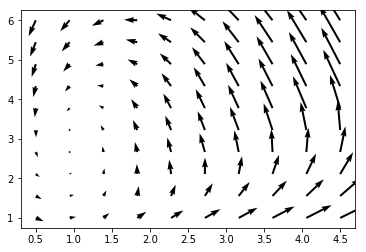

In [136]:
plt.quiver([p[0].detach().cpu() for p in mh], [p[1].detach().cpu() for p in mh], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])

In [137]:
U, V = [], []
t = torch.linspace(0,Ts,2)
for point in mh:
        xi0 = point.cpu()
        sol = odeint(LV, xi0, t)
        un, vn = calculateComponents(point, sol[-1])
        U.append(un)
        V.append(vn)

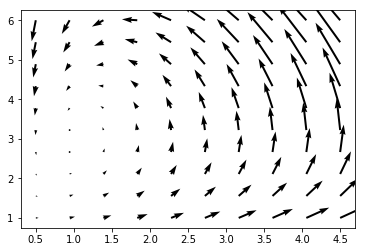

In [138]:
plt.quiver([p[0].detach().cpu() for p in mh], [p[1].detach().cpu() for p in mh], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])

### vec field on trajectory only

In [139]:
U, V = [], []
for i, point in enumerate(x[:-1]):
        un, vn = grad[i][0], grad[i][1]
        U.append(un)
        V.append(vn)

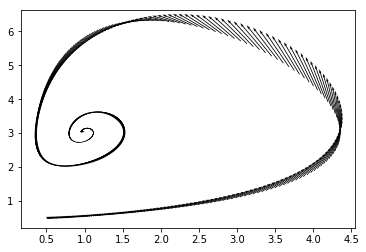

In [140]:
plt.quiver([p[0].detach().cpu() for p in x], [p[1].detach().cpu() for p in x], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])

In [141]:
U, V = [], []
for point in x:
        un, vn = obs.predictor(point.view(1,2))[0][0], obs.predictor(point.view(1,2))[0][1]
        U.append(un)
        V.append(vn)

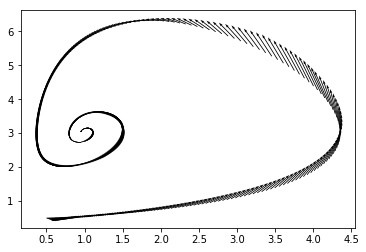

In [142]:
plt.quiver([p[0].detach().cpu() for p in x], [p[1].detach().cpu() for p in x], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])

In [143]:
U, V = [], []
t = torch.linspace(0,Ts,2)
for point in x:
        xi0 = point.cpu()
        sol = odeint(LV, xi0, t)
        un, vn = calculateComponents(point, sol[-1])
        U.append(un)
        V.append(vn)

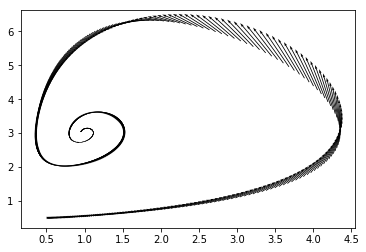

In [144]:
plt.quiver([p[0].detach().cpu() for p in x], [p[1].detach().cpu() for p in x], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])

# Iter training on multiple trajectories

In [ ]:
N = 40
Tf = 2
Ts = Tf/N
t = np.linspace(0,Tf,N).tolist()
obs = HDNN_Observer('MLP', [[2,36,2], False], [1,2,0], 1, 'cpu')
j = 0

for j in range(100):
    a = 3.0
    b = 1.0
    c = 1.0
    d = 1.0
    # Dissipation rate
    k = 0.25
    t = np.linspace(0,Tf,N).tolist()
    
    x0 = [np.random.randint(0,5), np.random.randint(0,5)]
    x = odeint(LV,x0,t)
    x = torch.Tensor(x).to(device)
    labels = x[1:]
    d = ([x[i+1] - x[i] for i in range(len(x)-1)])
    x0 = x[0].view(1,2)
    traj = obs.observe(x0, d, epoch=1, ode_t=1.5, ode_step=2, loss_record_interval=300)  
    print("AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA.{}".format(j))

In [10]:
mh = genpoints(0, 4, 0, 4, 10)

In [11]:
U, V = [], []
for point in mh:
        un, vn = obs.predictor(point.view(1,2))[0][0], obs.predictor(point.view(1,2))[0][1]
        U.append(un)
        V.append(vn)

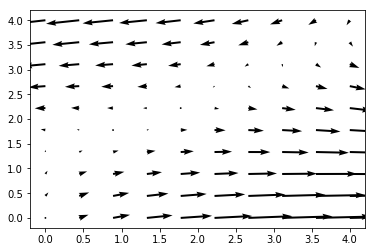

In [12]:
plt.quiver([p[0].detach().cpu() for p in mh], [p[1].detach().cpu() for p in mh], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])

In [13]:
    a = 3.0
    b = 1.0
    c = 1.0
    d = 1.0
    # Dissipation rate
    k = 0.25

In [16]:
U, V = [], []
t = torch.linspace(0,Ts,2)
for point in mh:
        xi0 = point.cpu()
        sol = odeint(LV, xi0, t)
        un, vn = calculateComponents(point, sol[-1])
        U.append(un)
        V.append(vn)

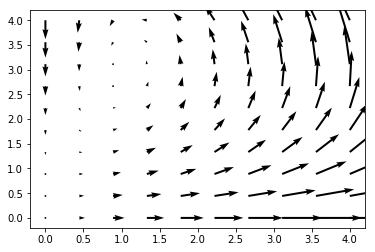

In [17]:
plt.quiver([p[0].detach().cpu() for p in mh], [p[1].detach().cpu() for p in mh], \
           [u.detach().cpu() for u in U], [v.detach().cpu() for v in V])

In [10]:
for p in range(len(t)-1):
    plt.scatter(traj[p][0][0].cpu().numpy(),t[p][0][1].cpu().numpy(), s=0.7, color='r')
    plt.scatter(labels[p][0].cpu().numpy(),labels[p][1].cpu().numpy(), s=0.7, color='b')
    plt.legend(['HDNN Observer','Lotke Volterra'])

TypeError: 'float' object is not subscriptable

## LSTM attempt with multiple trajectories

In [127]:
from torch.nn import LSTM

In [128]:
obs = HDNN('LSTM', [[999,999]], [1,2,0], 1, 'cpu')

AttributeError: module 'torchcontrol.arch_cpugpu' has no attribute 'LSTM'

In [69]:
import sys
sys.modules[__name__]

<module '__main__'>